INFO of the notebook
* submission: Dec.15th 10pm
* topic: capstone project 4
* leading question: **Can we establish a link between the density of physicians by specialty and by territory and the practice of exceeding fees?**
* collaboration: Soledad and Xuanqi
* Extra: We also wrote our design and questions regarding to our work, for analysis, please go stright down. But we appreciate any feedbacks on our design to help us have a better scope!

**Design of the work**

**1. Clarification of the question:**
- The leading question should be answered by the analysis of different varaibles: density of the physicians; exceeding fees; departement, specialist
- important concept: All paid-out services are taken as specialists, thus it includes sage-femmes, lab etc.

**2. Prepare the data:**
- To combine all the sheets of the same excel and then merge them.(Be careful of non-match rows) Meanwhile, to remove all unnecessary and duplicate data.
- "nc": missing values are replaced by 0 or mean depends on situation

**3. Data demonstration:**
- Overview of basic information for important varaibles

**4. Pre-Analysis:**
- Take a overlook on the data and then narrow the scope
- In this case, we used standard deviation to help us pick the cases

**5. Analysis:**
- Overall trending analysis of the correlation
- Following the pre-analysis, we picked: nurse; dentist, paris as our case-study targets.**Extension look**:We found the original data online and discovered another excel sheet concerning the same topic, but for regions(provinces) instead of department. We apply similiar process with an aim to view the data on a more general geographic/administrative division.)
-- case-study: Paris
-- case-study: Nurse (In regional scale)
-- case-study: Dentist (In regional scale)
- Other ideas:
-- use map to show data(suspended due to our limited knowledge of coding)
-- more on the way

**7. Proposition writing** （In progress, not yet ready）
- We expect to summurize and make propositions based on our analysis.

**Questions emerged during analysis**

1. how to count the density? (solved)
- density= effective * 100,000 / population

2. Linear Regression (solved)
- we found that the correlation between exceeding fee and density is reversible and thus we spent time to think which should be set as x, the other y 
- Then we realized that it should not be a linear regression,instead, it is a multiple regression.

3. Missing data of 69M lyon (???)
- While checking the data, we found there is only 69Rhone(population:1,882,339) instead of 69M lyon(population: 1,385,927) and 69D rhone (population: 1,835,903), it seems to us that Lyon is missing in this dataset.


In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Clarification of the question:
**Can we establish a link between the density of physicians by specialty and by territory and the practice of exceeding fees?**
(All paid-out services are taken as specialists)

# Preparation work:
## import data, combine sheets, merge
### import all sheets of physicians

In [2]:
density_s=pd.read_excel("density2018.xls", sheet_name =2)
density_g=pd.read_excel("density2018.xls", sheet_name =3)
density_a=pd.read_excel("density2018.xls", sheet_name =4)
density_sa=pd.read_excel("density2018.xls", sheet_name =5)
density_d=pd.read_excel("density2018.xls", sheet_name =6)
density_l=pd.read_excel("density2018.xls", sheet_name =7)
fee_s = pd.read_excel("fee2018.xls", sheet_name = 2)
fee_g = pd.read_excel("fee2018.xls", sheet_name = 3)
fee_d = pd.read_excel("fee2018.xls", sheet_name = 4)
fee_sa = pd.read_excel("fee2018.xls", sheet_name = 5)
fee_a = pd.read_excel("fee2018.xls", sheet_name = 6)
fee_l = pd.read_excel("fee2018.xls", sheet_name = 7)
## notice that the order of sheets are different

### rename the column and combine the sheets in each excel

In [3]:
density_g = density_g.rename(columns={'Généralistes et compétence MEP':'Spécialistes'})
density_a = density_a.rename(columns={'Auxiliaires médicaux':'Spécialistes'})
density_sa = density_sa.rename(columns={'Sages-femmes':'Spécialistes'})
density_d = density_d.rename(columns={'Chirurgiens-dentistes et ODF':'Spécialistes'})
density_l = density_l.rename(columns={'Laboratoires':'Spécialistes'})
fee_g = fee_g.rename(columns={'Généralistes et compétences MEP':'Spécialistes'})
fee_a = fee_a.rename(columns={'Auxiliaires médicaux':'Spécialistes'})
fee_sa = fee_sa.rename(columns={'Sages-femmes':'Spécialistes'})
fee_d = fee_d.rename(columns={'Chirurgiens-dentistes et ODF':'Spécialistes'})
fee_l = fee_l.rename(columns={'Laboratoires':'Spécialistes'})

In [4]:
density_s = density_s[:5824]
##the fee info of medecins biologistes (from 5826-end) is not given 
##take only first 5824 (-1 for top row of names, -1 row 0 ) of density

In [5]:
density_all = density_s.append(density_g).append(density_a).append(density_sa).append(density_d).append(density_l)
density_all.count()

Spécialistes             14456
DEPARTEMENT              14456
EFFECTIF                 14456
POPULATION FRANCAISE     14456
DENSITE /100 000 hab.    14456
dtype: int64

In [7]:
fee_all = fee_s.append(fee_g).append(fee_a).append(fee_sa).append(fee_d).append(fee_l)
fee_all.count()
#to make sure they have the same amouts of rows for later merge

Spécialistes                           14456
DEPARTEMENT                            14456
EFFECTIFS                              14456
HONORAIRES SANS DEPASSEMENT (Euros)    14456
DEPASSEMENTS (Euros)                   14456
FRAIS DE DEPLACEMENT (Euros)           14456
TOTAL DES HONORAIRES (Euros)           14456
dtype: int64

### define the useful data
** Specialistes, departement, densite, depassements (possibly poplutaion and effectif)

In [9]:
density_all.head()

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18,653688.0,2.753607
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,528016.0,3.598376
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17,333065.0,5.104109
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,161980.0,2.469441
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,6,141784.0,4.231789


In [11]:
useful_density = density_all.iloc[:, [True, True, True, True, True]]
useful_density.head()
## other options: use name.drop(["columnname"],axis=1)

,Spécialistes,DEPARTEMENT,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18,653688.0,2.753607
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,528016.0,3.598376
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17,333065.0,5.104109
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,161980.0,2.469441
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,6,141784.0,4.231789


In [12]:
fee_all.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,18,5.13279e+06,2.6588e+06,0,7.79159e+06
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,5.26123e+06,456535,0,5.71777e+06
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17,5.0744e+06,531455,0,5.60586e+06
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,4,nc,nc,nc,nc
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,6,nc,nc,nc,nc


In [13]:
useful_fee = fee_all.iloc[:, [True, True, False, False, True, False, False]]
useful_fee.head()

,Spécialistes,DEPARTEMENT,DEPASSEMENTS (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,2.6588e+06
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,456535
2,02- Anesthésie-réanimation chirurgicale,03- Allier,531455
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,nc
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,nc


### merge

In [14]:
fee_den=useful_fee.merge(useful_density, how="inner", on=["Spécialistes","DEPARTEMENT"])
fee_den.head()

,Spécialistes,DEPARTEMENT,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,01- Ain,2.6588e+06,18,653688.0,2.753607
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,456535,19,528016.0,3.598376
2,02- Anesthésie-réanimation chirurgicale,03- Allier,531455,17,333065.0,5.104109
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,nc,4,161980.0,2.469441
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,nc,6,141784.0,4.231789


In [15]:
fee_den.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14248 entries, 0 to 14247
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Spécialistes           14248 non-null  object 
 1   DEPARTEMENT            14248 non-null  object 
 2   DEPASSEMENTS (Euros)   14248 non-null  object 
 3   EFFECTIF               14248 non-null  int64  
 4   POPULATION FRANCAISE   14248 non-null  float64
 5   DENSITE /100 000 hab.  14248 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 779.2+ KB


### check missing values, modify data type etc
- nc represents missing value
- depassements and densite should be int/float for analysis

In [16]:
fee_den["DEPASSEMENTS (Euros)"]= fee_den["DEPASSEMENTS (Euros)"].replace("nc","0")
fee_den["DEPASSEMENTS (Euros)"] = fee_den["DEPASSEMENTS (Euros)"].astype(int)

In [17]:
fee_den.tail(5)

,Spécialistes,DEPARTEMENT,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
14243,TOTAL LABORATOIRES,973- Guyane,937,11,296711.0,3.707311
14244,TOTAL LABORATOIRES,974- Réunion,418,56,866506.0,6.462737
14245,TOTAL LABORATOIRES,976- Mayotte,0,1,270372.0,0.369861
14246,TOTAL LABORATOIRES,TOTAL OUTRE-MER,313714,123,2180647.0,5.640528
14247,TOTAL LABORATOIRES,TOTAL France ENTIERE,912444,3864,66992699.0,5.767793


### seperate TOTAL and specific counts

In [18]:
sep_df = fee_den[(fee_den["Spécialistes"].str.contains("TOTAL")==False)&
 (fee_den["DEPARTEMENT"].str.contains("TOTAL")==False)]

In [19]:
sep_df.head()

,Spécialistes,DEPARTEMENT,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,01- Ain,2658795,18,653688.0,2.753607
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,456534,19,528016.0,3.598376
2,02- Anesthésie-réanimation chirurgicale,03- Allier,531455,17,333065.0,5.104109
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,0,4,161980.0,2.469441
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,0,6,141784.0,4.231789


# Data Demonstration
## overview of the exceeding fees
**In Paris, people spent most to pay the exceeding fees.**

In [112]:
sep_dep_sum = sep_df.groupby("DEPARTEMENT").sum().sort_values(by="DEPASSEMENTS (Euros)",ascending=False)
sep_dep_sum.head()

,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
DEPARTEMENT,,,,
75- Paris (Ville),1005553034,17816,269706276.0,832.318785
69- Rhône,415833245,13245,237174714.0,703.645836
92- Hauts-de-Seine,385455156,8301,202367088.0,516.845901
13- Bouches-du-Rhône,266986555,19276,256461660.0,947.032785
78- Yvelines,264636543,6828,181009206.0,475.295163


**People paid exceeding fee mostly to see a denstist**

In [114]:
sep_spe_sum = sep_df.groupby("Spécialistes").sum().sort_values(by="DEPASSEMENTS (Euros)",ascending=False)
sep_spe_sum.head()

,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
Spécialistes,,,,
19- Chirurgiens-dentistes,4194006342,34921,66992699.0,4877.907539
"36- Chirurgiens-dentistes, spécialistes O.D.F.",707821641,2128,66992699.0,269.598976
15- Ophtalmologie,491100887,4611,66992699.0,595.328386
41- Chirurgie orthopédique et traumatologie,324510465,2581,66992699.0,343.575267
02- Anesthésie-réanimation chirurgicale,297917899,3644,66992699.0,452.542959


## overview of the active specialists 

**Most of phycisians are gathered in 13, 75, 59**

In [115]:
sep_dep_eff=sep_df.groupby("DEPARTEMENT").sum().sort_values(by="EFFECTIF",ascending=False)
sep_dep_eff.head()

,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
DEPARTEMENT,,,,
13- Bouches-du-Rhône,266986555,19276,256461660.0,947.032785
75- Paris (Ville),1005553034,17816,269706276.0,832.318785
59- Nord,243202682,17187,326615310.0,663.031381
33- Gironde,213220069,13257,204150618.0,818.210602
69- Rhône,415833245,13245,237174714.0,703.645836


Nurses are needed mostly among all types of phycians. In other words, among all physicians, for the same amount group of people, more nursed are needed compare to others.

In [118]:
sep_spe_eff=sep_df.groupby("Spécialistes").sum().sort_values(by="EFFECTIF",ascending=False)
sep_spe_eff.head()

,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
Spécialistes,,,,
24- Infirmiers,2105187,93206,66992699.0,15389.155851
26- Masseurs-kinésithérapeutes-rééducateurs,97827554,67860,66992699.0,9562.863251
01- OMNIPRATICIENS,224534029,58900,66992699.0,8704.456239
01- Médecine générale,124834491,52641,66992699.0,7835.958099
19- Chirurgiens-dentistes,4194006342,34921,66992699.0,4877.907539


# Pre-Analysis
## std 
- In this section, we take standard deviation to find abnormal data and to define our later case-study.
### For specialists,
- “19- Chirurgiens-dentistes”, compared to other specialists, they have a great density, which also leads to a huge sum of exceeding fees.
-"24- Infirmiers", compared to other specialists,they also have a great density, however, the sum of exceeding fees are comparatively small.

In [29]:
fee_std =sep_df.groupby("Spécialistes").std()
fee_sorted = fee_std.sort_values(by="DEPASSEMENTS (Euros)",ascending= False)
fee_sorted
#from right to left in the graph

,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
Spécialistes,,,,
19- Chirurgiens-dentistes,3.977951e+07,341.174308,510311.96228,13.906842
"36- Chirurgiens-dentistes, spécialistes O.D.F.",9.159576e+06,24.156265,510311.96228,1.336086
15- Ophtalmologie,8.900900e+06,54.553906,510311.96228,2.433482
06- Radiodiagnostic et imagerie médicale,8.208268e+06,56.575002,510311.96228,2.555132
02- Anesthésie-réanimation chirurgicale,6.549296e+06,43.246892,510311.96228,2.466935
...,...,...,...,...
40- Audiométrie,0.000000e+00,0.140014,510311.96228,0.006712
70- Pédiatrie,0.000000e+00,0.609983,510311.96228,0.100671
71- Hématologie,0.000000e+00,0.964108,510311.96228,0.134069


In [98]:
fee_std.sort_values(by="EFFECTIF",ascending=False).head()
#from top to the bottom in the graph

,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
Spécialistes,,,,
24- Infirmiers,1.397405e+05,844.597289,510311.96228,70.445366
26- Masseurs-kinésithérapeutes-rééducateurs,5.622915e+06,680.056781,510311.96228,38.413449
01- OMNIPRATICIENS,5.880097e+06,497.805807,510311.96228,17.390000
01- Médecine générale,3.687997e+06,439.613854,510311.96228,15.746008
19- Chirurgiens-dentistes,3.977951e+07,341.174308,510311.96228,13.906842


- **“19- Chirurgiens-dentistes”: the one in the right bottom corner**
- **"24- Infirmiers": the one in the left top corner**

<AxesSubplot:xlabel='DEPASSEMENTS (Euros)', ylabel='EFFECTIF'>

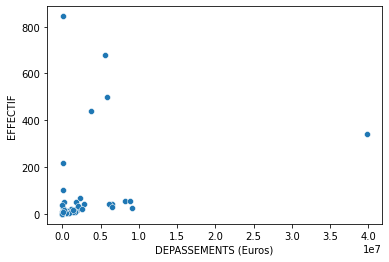

In [99]:
sns.scatterplot(x="DEPASSEMENTS (Euros)",y="EFFECTIF",data=fee_std)

### For department
- For Paris, the sum of its exceeding fee is the highest
- For 13- Bouches-du-Rhône, it has the highest density of specialists and the highest number of active doctors, but the exceeding fees is comparatively small

In [37]:
dep_sum =sep_df.groupby("DEPARTEMENT").sum()
dep_sum.sort_values(by="DEPASSEMENTS (Euros)",ascending=False)

,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
DEPARTEMENT,,,,
75- Paris (Ville),1005553034,17816,269706276.0,832.318785
69- Rhône,415833245,13245,237174714.0,703.645836
92- Hauts-de-Seine,385455156,8301,202367088.0,516.845901
13- Bouches-du-Rhône,266986555,19276,256461660.0,947.032785
78- Yvelines,264636543,6828,181009206.0,475.295163
...,...,...,...,...
15- Cantal,7725072,877,18097002.0,610.609426
23- Creuse,5800116,673,14784840.0,573.546958
48- Lozère,4691441,420,9538200.0,554.821664


In the following graph, paris is the right top, and 13 Bouches-du-Rhône is the highest(top middle)

<AxesSubplot:xlabel='DEPASSEMENTS (Euros)', ylabel='EFFECTIF'>

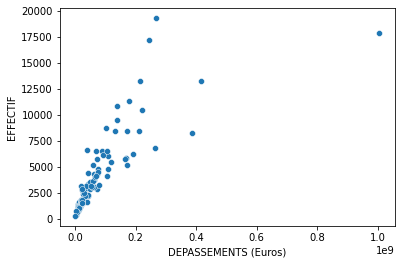

In [35]:
sns.scatterplot(data=dep_sum,x ="DEPASSEMENTS (Euros)",y="EFFECTIF")

According to the graph below, Paris also has a higher standard deviation, so we decide to take it as our case study.

In [38]:
dep_std =sep_df.groupby("DEPARTEMENT").std()
dep_std.sort_values(by="DEPASSEMENTS (Euros)",ascending=False).head()
#from right to left in the graph

,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
DEPARTEMENT,,,,
75- Paris (Ville),2.742037e+07,440.470477,0.0,20.577675
69- Rhône,1.396386e+07,383.527368,0.0,20.375042
13- Bouches-du-Rhône,1.371788e+07,643.169091,0.0,31.598994
92- Hauts-de-Seine,1.294371e+07,215.494765,0.0,13.417370
59- Nord,1.078816e+07,534.735571,0.0,20.628758


# Analysis
### trend of two correlations(exceeding fee&density)
- through specialist
- through department

In [120]:
fee_corr =sep_df.groupby("Spécialistes").corr()
fee_corr_sort = fee_corr[fee_corr["DEPASSEMENTS (Euros)"] != 1].sort_values(by="DEPASSEMENTS (Euros)",ascending=False)
fee_corr_sort = fee_corr_sort.dropna() #drop all NaN
fee_corr_sort = fee_corr_sort.reset_index()

In [119]:
dep_corr =sep_df.groupby("DEPARTEMENT").corr()
dep_corr_sort = dep_corr[dep_corr["DEPASSEMENTS (Euros)"] != 1].sort_values(by="DEPASSEMENTS (Euros)",ascending=False)
#dep_corr_sort = dep_corr_sort.dropna() #drop all NaN
dep_corr_sort = dep_corr_sort.reset_index()

**We can see there is a normal distribution to check density VS exceeding fees through specialistes**

/Users/xuanqizhao/opt/miniconda3/envs/my-conda-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


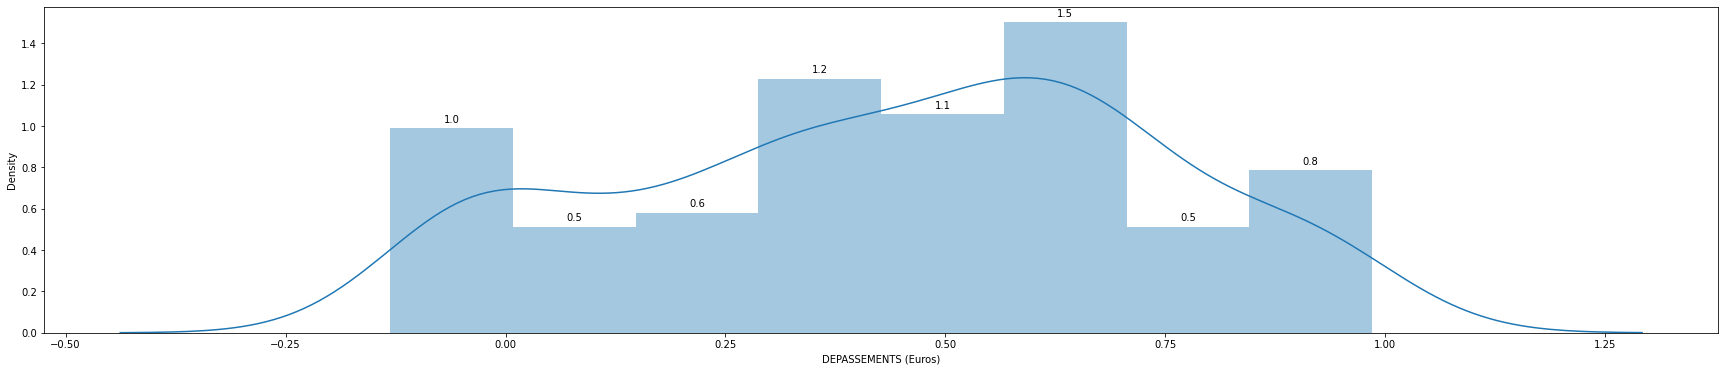

In [122]:
# An almost symmetric correlation distribution 
# density VS exceeding fees through specialistes
plt.figure(figsize=(30, 6))
fee_corr =sns.distplot(fee_corr_sort["DEPASSEMENTS (Euros)"])
for p in fee_corr.patches:
    fee_corr.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

**We can see there is a right skewed distribution to check density VS exceeding fees through specialistes**

/Users/xuanqizhao/opt/miniconda3/envs/my-conda-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


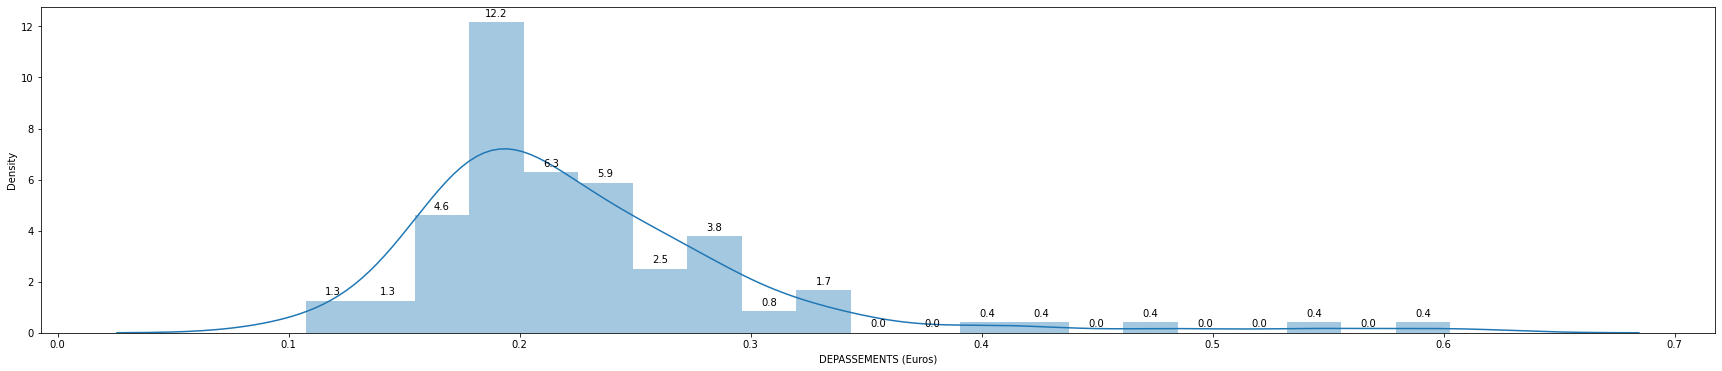

In [121]:
# A right skewed distribution
# density VS exceeding fees through department
plt.figure(figsize=(30, 6))
corr_plot =sns.distplot(dep_corr_sort["DEPASSEMENTS (Euros)"])
for p in corr_plot.patches:
    corr_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Case study: Paris
### group specialist

In [123]:
paris = fee_den[fee_den["DEPARTEMENT"].str.contains("Paris")]
paris.head()

,Spécialistes,DEPARTEMENT,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
75,02- Anesthésie-réanimation chirurgicale,75- Paris (Ville),41393312,206,2140526.0,9.623803
179,20- Réanimation médicale,75- Paris (Ville),0,0,2140526.0,0.000000
283,"TOTAL ANESTHESIE REANIMATION (02, 20)",75- Paris (Ville),41393312,206,2140526.0,9.623803
387,03- Pathologie cardio-vasculaire,75- Paris (Ville),14943428,300,2140526.0,14.015247
491,43- Chirurgie infantile,75- Paris (Ville),0,9,2140526.0,0.420457


**In general, like the other regions, paris also spent most to pay dentist and there are most people serves as auxiliary medicines(nurse).**

In [126]:
paris_total = paris[paris["Spécialistes"].str.contains("TOTAL")]
paris_total = paris_total.drop([5483,5587]) #drop total medicin & drop total specialists
paris_total.sort_values(by="DEPASSEMENTS (Euros)",ascending=False)

,Spécialistes,DEPARTEMENT,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
13803,TOTAL CHIRURGIE DENTAIRE,75- Paris (Ville),299029706,2223,2140526.0,103.852978
2051,"TOTAL RADIOLOGIE (72, 74, 76, 06)",75- Paris (Ville),74821758,360,2140526.0,16.818296
2571,"TOTAL GYNECOLOGIE (70, 77, 79, 07)",75- Paris (Ville),70881788,507,2140526.0,23.685767
13179,TOTAL AUXILIAIRES MEDICAUX,75- Paris (Ville),55809755,5987,2140526.0,279.697607
283,"TOTAL ANESTHESIE REANIMATION (02, 20)",75- Paris (Ville),41393312,206,2140526.0,9.623803
3507,"TOTAL PEDIATRIE (78, 12)",75- Paris (Ville),15973997,207,2140526.0,9.670520
4235,"TOTAL STOMATOLOGIE (69, 45, 18)",75- Paris (Ville),14723136,104,2140526.0,4.858619
3091,"TOTAL MEDECINE INTERNE (71, 73, 09)",75- Paris (Ville),4572796,70,2140526.0,3.270224
14219,TOTAL LABORATOIRES,75- Paris (Ville),294796,162,2140526.0,7.568233


### each specific phycisians

**In Paris,26- Masseurs-kinésithérapeutes-rééducateurs has the highest density, and it is higher than the mean of the country. For 24- Infirmiers, its density serves half of the average, and for dentist, it serves twice of the average. However, as other regions, they share the similiar rank of the density**

In [129]:
paris_sp=paris[paris["Spécialistes"].str.contains("TOTAL")==False]
paris_sp = paris_sp[((paris_sp["DEPASSEMENTS (Euros)"]==0) |
                 (paris_sp["DEPASSEMENTS (Euros)"]==-1))==False]
paris_sp.sort_values(by="DENSITE /100 000 hab.",ascending=False).head()

,Spécialistes,DEPARTEMENT,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
12763,26- Masseurs-kinésithérapeutes-rééducateurs,75- Paris (Ville),53339292,3014,2140526.0,140.806512
5899,01- OMNIPRATICIENS,75- Paris (Ville),52983299,2342,2140526.0,109.412359
13387,19- Chirurgiens-dentistes,75- Paris (Ville),267198608,2100,2140526.0,98.106727
5691,01- Médecine générale,75- Paris (Ville),31977484,1787,2140526.0,83.484153
12659,24- Infirmiers,75- Paris (Ville),1404067,1530,2140526.0,71.477758


In [136]:
fee_mean =sep_df.groupby("Spécialistes").mean()
fee_mean.sort_values(by="DENSITE /100 000 hab.",ascending=False).head()

,DEPASSEMENTS (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
Spécialistes,,,,
24- Infirmiers,2.084344e+04,922.831683,663294.049505,152.367880
26- Masseurs-kinésithérapeutes-rééducateurs,9.685896e+05,671.881188,663294.049505,94.681814
01- OMNIPRATICIENS,2.223109e+06,583.168317,663294.049505,86.182735
01- Médecine générale,1.235985e+06,521.198020,663294.049505,77.583744
19- Chirurgiens-dentistes,4.152482e+07,345.752475,663294.049505,48.296114


## Region
**similiar process to prepare the data**

In [137]:
r_density_s=pd.read_excel("density2018_r.xls", sheet_name =2)
r_density_g=pd.read_excel("density2018_r.xls", sheet_name =3)
r_density_a=pd.read_excel("density2018_r.xls", sheet_name =4)
r_density_sa=pd.read_excel("density2018_r.xls", sheet_name =5)
r_density_d=pd.read_excel("density2018_r.xls", sheet_name =6)
r_density_l=pd.read_excel("density2018_r.xls", sheet_name =7)
r_fee_s = pd.read_excel("fee2018_r.xls", sheet_name = 2)
r_fee_g = pd.read_excel("fee2018_r.xls", sheet_name = 3)
r_fee_d = pd.read_excel("fee2018_r.xls", sheet_name = 4)
r_fee_sa = pd.read_excel("fee2018_r.xls", sheet_name = 5)
r_fee_a = pd.read_excel("fee2018_r.xls", sheet_name = 6)
r_fee_l = pd.read_excel("fee2018_r.xls", sheet_name = 7)

In [138]:
r_density_g = r_density_g.rename(columns={'Généralistes et compétences MEP':'Spécialistes'})
r_density_a = r_density_a.rename(columns={'Auxiliaires médicaux':'Spécialistes'})
r_density_sa = r_density_sa.rename(columns={'Sages-femmes':'Spécialistes'})
r_density_d = r_density_d.rename(columns={'Chirurgiens-dentistes et ODF':'Spécialistes'})
r_density_l = r_density_l.rename(columns={'Laboratoires':'Spécialistes'})
r_fee_g = r_fee_g.rename(columns={'Généralistes et compétences MEP':'Spécialistes'})
r_fee_a = r_fee_a.rename(columns={'Auxiliaires médicaux':'Spécialistes'})
r_fee_sa = r_fee_sa.rename(columns={'Sages-femmes':'Spécialistes'})
r_fee_d = r_fee_d.rename(columns={'Chirurgiens-dentistes et ODF':'Spécialistes'})
r_fee_l = r_fee_l.rename(columns={'Laboratoires':'Spécialistes'})

In [139]:
r_density_s=r_density_s[:1197].reset_index()
r_density_s=r_density_s.drop(r_density_s.index[315:336])
r_density_s = r_density_s.drop("index",axis=1)
r_density_s

,Spécialistes,REGION INSEE,EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,11- Ile-de-France,617,12213364,5.051843
1,02- Anesthésie-réanimation chirurgicale,24- Centre-Val-de-Loire,92,2566759,3.584287
2,02- Anesthésie-réanimation chirurgicale,27- Bourgogne et Franche-Comté,106,2795301,3.792078
3,02- Anesthésie-réanimation chirurgicale,28- Normandie,134,3319067,4.037279
4,02- Anesthésie-réanimation chirurgicale,32- Hauts-de-France,283,5978266,4.733814
...,...,...,...,...,...
1192,TOTAL MEDECINS,03- Guyane,172,296711,57.968865
1193,TOTAL MEDECINS,04- Réunion,1361,866506,157.067579
1194,TOTAL MEDECINS,06- Mayotte,32,270372,11.835545
1195,TOTAL MEDECINS,TOTAL OUTRE-MER,2656,2180647,121.798714


In [141]:
r_density_all = r_density_s.append(r_density_g).append(r_density_a).append(r_density_sa).append(r_density_d).append(r_density_l)
r_density_all.count()

Spécialistes             2919
REGION INSEE             2919
EFFECTIF                 2919
POPULATION FRANCAISE     2919
DENSITE /100 000 hab.    2919
dtype: int64

In [142]:
r_fee_all = r_fee_s.append(r_fee_g).append(r_fee_a).append(r_fee_sa).append(r_fee_d).append(r_fee_l)
r_fee_all.count()

Spécialistes                           2919
REGION INSEE                           2919
EFFECTIFS                              2919
HONORAIRES SANS DEPASSEMENT (Euros)    2919
DEPASSEMENTS (Euros)                   2919
FRAIS DE DEPLACEMENT (Euros)           2919
TOTAL DES HONORAIRES (Euros)           2919
dtype: int64

### Case study of Dentist from region scale

In [146]:
r_dentist = r_density_all[r_density_all["Spécialistes"]=="19- Chirurgiens-dentistes"]
fee_dentist=r_fee_all[r_fee_all["Spécialistes"]=="19- Chirurgiens-dentistes"]
dentist=fee_dentist.drop(["HONORAIRES SANS DEPASSEMENT (Euros)","FRAIS DE DEPLACEMENT (Euros)"],axis=1)
dentist = dentist.rename(columns={'REGION INSEE':'region',"EFFECTIFS":"EFFECTIF"})
r_dentist = r_dentist.rename(columns={'REGION INSEE':'region'})
dentist_t = dentist.merge(r_dentist, how="inner",on=["Spécialistes","region","EFFECTIF"])
dentist_t = dentist_t.rename(columns={'DEPASSEMENTS (Euros)':'exceeding_fees',"POPULATION FRANCAISE":"population"})
dentist_t =dentist_t[dentist_t["region"].str.contains("TOTAL")==False]
dentist_t.head()

,Spécialistes,region,EFFECTIF,exceeding_fees,TOTAL DES HONORAIRES (Euros),population,DENSITE /100 000 hab.
0,19- Chirurgiens-dentistes,11- Ile-de-France,6551,9.15695e+08,1.65772e+09,12213364,53.637966
1,19- Chirurgiens-dentistes,24- Centre-Val-de-Loire,980,1.50543e+08,2.953e+08,2566759,38.180445
2,19- Chirurgiens-dentistes,27- Bourgogne et Franche-Comté,1154,1.71407e+08,3.46123e+08,2795301,41.283568
3,19- Chirurgiens-dentistes,28- Normandie,1156,1.63549e+08,3.39482e+08,3319067,34.829065
4,19- Chirurgiens-dentistes,32- Hauts-de-France,2472,2.73652e+08,6.37818e+08,5978266,41.349783


In [149]:
dentist_t["exceeding_fees"]=dentist_t["exceeding_fees"].replace("nc",0)
dentist_t["TOTAL DES HONORAIRES (Euros)"]=dentist_t["TOTAL DES HONORAIRES (Euros)"].replace("nc",0)
dentist_t["exceeding_fees"] = dentist_t["exceeding_fees"].astype(int)
dentist_t["TOTAL DES HONORAIRES (Euros)"] = dentist_t["TOTAL DES HONORAIRES (Euros)"].astype(int)
dentist_t.describe()

,EFFECTIF,exceeding_fees,TOTAL DES HONORAIRES (Euros),population,DENSITE /100 000 hab.
count,18.000000,1.800000e+01,1.800000e+01,1.800000e+01,18.000000
mean,1940.055556,2.330004e+08,4.791348e+08,3.721817e+06,47.221881
std,1826.927233,2.378144e+08,4.458886e+08,3.242771e+06,15.592875
min,9.000000,0.000000e+00,0.000000e+00,2.703720e+05,3.328747
25%,275.000000,2.374150e+07,6.256620e+07,5.036545e+05,41.300122
50%,1463.500000,1.786567e+08,3.800908e+08,3.324231e+06,52.560771
75%,3174.000000,3.665368e+08,7.772660e+08,5.799160e+06,54.349773
max,6551.000000,9.156949e+08,1.657715e+09,1.221336e+07,71.094361


<AxesSubplot:xlabel='population', ylabel='exceeding_fees'>

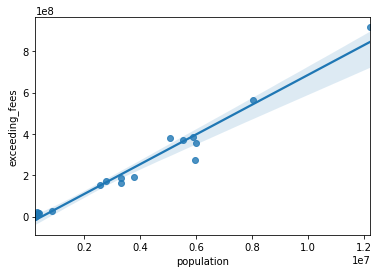

In [150]:
sns.regplot(x="population",y="exceeding_fees",data=dentist_t)

In [151]:
dentist_t.corr()

,EFFECTIF,exceeding_fees,TOTAL DES HONORAIRES (Euros),population,DENSITE /100 000 hab.
EFFECTIF,1.000000,0.984927,0.994754,0.978960,0.484000
exceeding_fees,0.984927,1.000000,0.994750,0.983404,0.409098
TOTAL DES HONORAIRES (Euros),0.994754,0.994750,1.000000,0.990408,0.443612
population,0.978960,0.983404,0.990408,1.000000,0.382251
DENSITE /100 000 hab.,0.484000,0.409098,0.443612,0.382251,1.000000


In [152]:
dentist_result = smf.ols("exceeding_fees ~  population+EFFECTIF",data=dentist_t).fit()
dentist_result.params.sort_values(ascending=False)

EFFECTIF      6.944762e+04
population    3.381718e+01
Intercept    -2.759323e+07
dtype: float64

### Case study of Nurse from region scale

In [158]:
r_nurse = r_density_all[r_density_all["Spécialistes"]=="24- Infirmiers"]
fee_nurse=r_fee_all[r_fee_all["Spécialistes"]=="24- Infirmiers"]
nurse = nurse.rename(columns={'REGION INSEE':'region',"EFFECTIFS":"EFFECTIF"})
r_nurse = r_nurse.rename(columns={'REGION INSEE':'region'})
nurse_t = nurse.merge(r_nurse, how="inner",on=["Spécialistes","region","EFFECTIF"])
nurse_t = nurse_t.rename(columns={'DEPASSEMENTS (Euros)':'exceeding_fees',"POPULATION FRANCAISE":"population"})
nurse_t["exceeding_fees"] = nurse_t["exceeding_fees"].astype(int)
nurse_t.head()

,Spécialistes,region,EFFECTIF,exceeding_fees,population,DENSITE /100 000 hab.
0,24- Infirmiers,11- Ile-de-France,7436,1649692,12213364,60.884127
1,24- Infirmiers,24- Centre-Val-de-Loire,2341,14884,2566759,91.204511
2,24- Infirmiers,27- Bourgogne et Franche-Comté,3236,18975,2795301,115.765708
3,24- Infirmiers,28- Normandie,3456,18215,3319067,104.125647
4,24- Infirmiers,32- Hauts-de-France,8068,33572,5978266,134.955521


In [161]:
nurse_sep = nurse_t[nurse_t["region"].str.contains("TOTAL")==False]
nurse_sep.sort_values(by="exceeding_fees",ascending=False).head()

,Spécialistes,region,EFFECTIF,exceeding_fees,population,DENSITE /100 000 hab.
0,24- Infirmiers,11- Ile-de-France,7436,1649692,12213364,60.884127
11,24- Infirmiers,93- Provence-Alpes-Côte d'Azur,12996,83435,5059473,256.864697
8,24- Infirmiers,75- Nouvelle Aquitaine,10331,77507,5987014,172.556804
10,24- Infirmiers,84- Auvergne et Rhône-Alpes,11463,57902,8026685,142.811136
9,24- Infirmiers,76- Occitanie,12855,38816,5892817,218.146941


In [162]:
nurse_sep.describe()

,EFFECTIF,exceeding_fees,population,DENSITE /100 000 hab.
count,18.000000,1.800000e+01,1.800000e+01,18.000000
mean,5178.111111,1.169571e+05,3.721817e+06,165.485851
std,4412.735471,3.833323e+05,3.242771e+06,92.093983
min,125.000000,2.410000e+02,2.703720e+05,46.232598
25%,1357.250000,6.870250e+03,5.036545e+05,94.434795
50%,3346.000000,2.248800e+04,3.324231e+06,138.883328
75%,7910.000000,3.842875e+04,5.799160e+06,216.206494
max,12996.000000,1.649692e+06,1.221336e+07,344.361957


In [163]:
nurse_sep.corr()

,EFFECTIF,exceeding_fees,population,DENSITE /100 000 hab.
EFFECTIF,1.000000,0.185624,0.757611,0.023534
exceeding_fees,0.185624,1.000000,0.692138,-0.281048
population,0.757611,0.692138,1.000000,-0.347801
DENSITE /100 000 hab.,0.023534,-0.281048,-0.347801,1.000000


<AxesSubplot:xlabel='population', ylabel='exceeding_fees'>

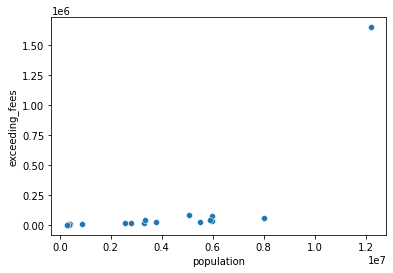

In [164]:
sns.scatterplot(x="population",y="exceeding_fees",data=nurse_sep)

In [166]:
result = smf.ols("exceeding_fees ~  population",data=nurse_sep).fit()
result.params.sort_values(ascending=False)

population         0.081819
Intercept    -187556.695369
dtype: float64

- We implemented an Ordinary Least Squares(OLS) model for multiple regressions to figure out the causation among exceeding fees with population, effectif, and region.
- From the below table, we interpret that in nurse industry, when the density of nurses stay the same, Pays-de-Loire and Grand-Est are two least regions that are willing to an increase in the fees. 